In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df = df.dropna(axis=1)

In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.replace({'v1':{'ham':0, 'spam':1}},inplace = True)

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_17524\2200089321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'v1':{'ham':0, 'spam':1}},inplace = True)


In [8]:
df = df.rename(columns={'v1':'target', 'v2':'text'})

In [9]:
df.sample(5)

,target,text
847,0,I am in office:)whats the matter..msg me now.i...
4785,0,Holy living christ what is taking you so long
5128,0,Wot about on wed nite I am 3 then but only til 9!
3928,0,Yes. Nigh you cant aha.
3740,1,2/2 146tf150p


In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.sample(5)

,target,text
36,0,"Oops, I'll let you know when my roommate's done"
3280,0,I tot it's my group mate... Lucky i havent rep...
516,1,Boltblue tones for 150p Reply POLY# or MONO# e...
586,0,"I dun thk i'll quit yet... Hmmm, can go jazz ?..."
5358,0,Hmm. Shall i bring a bottle of wine to keep us...


In [13]:
df.shape

(5169, 2)

In [14]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [15]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

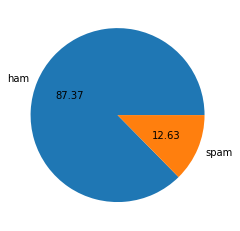

In [16]:
from matplotlib import pyplot as plt

plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct ="%0.2f")
plt.show()

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRATHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.sample(5)

,target,text,num_characters
893,0,It's ok i noe u're busy but i'm really too bor...,104
4075,1,87077: Kick off a new season with 2wks FREE go...,114
171,0,"Hmmm.. Thk sure got time to hop ard... Ya, can...",94
1335,0,"Sometimes we put walls around our hearts,not j...",162
5360,0,"Hey, iouri gave me your number, I'm wylie, rya...",56


In [21]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
4296,1,thesmszone.com lets you send free anonymous an...,138,27,2
1785,0,I dun believe u. I thk u told him.,34,10,1
975,0,Hey no I ad a crap nite was borin without ya 2...,118,29,2
551,0,"Hurry up, I've been weed-deficient for like th...",54,11,1
4932,0,Once free call me sir.,22,6,1


In [25]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

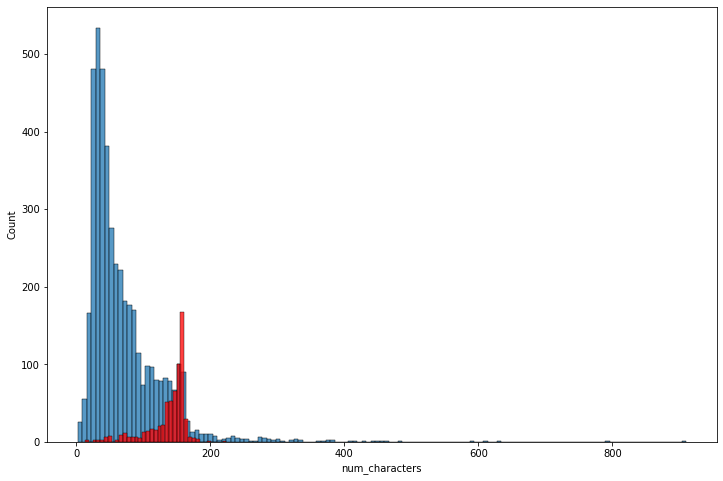

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

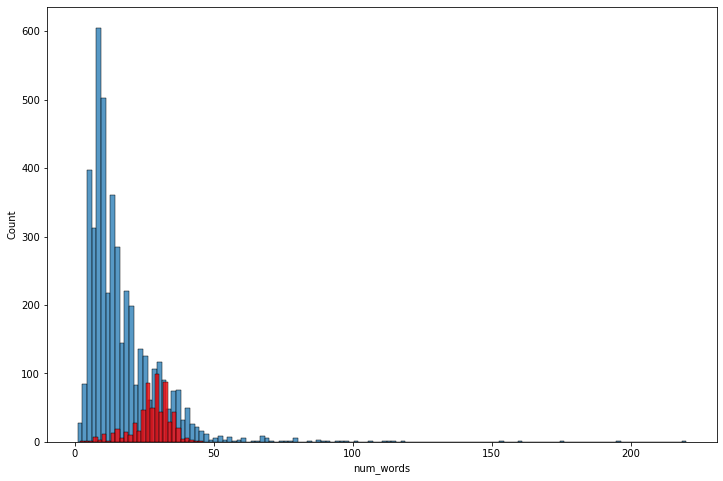

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

plt.show()

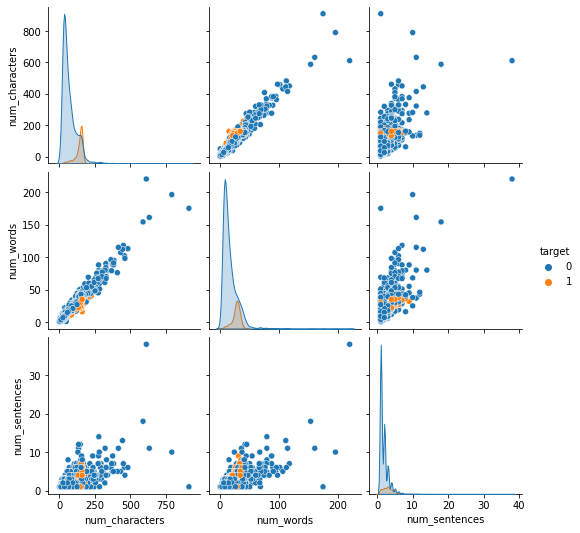

In [30]:
sns.pairplot(df,hue='target')

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_17524\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

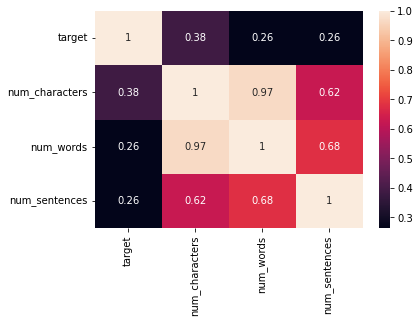

In [31]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming

In [32]:
import nltk
import string
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [33]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [34]:
transform_text("HEY HOW ARE YOU ? i hope you ! are $ good")

'hey hope good'

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [37]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [38]:
from collections import Counter


In [39]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

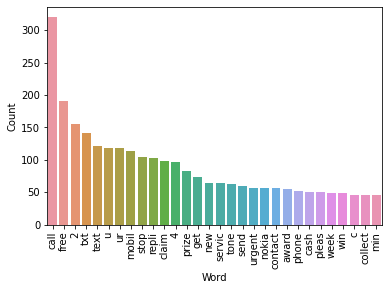

In [40]:
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
ham_word_counter = Counter(ham_corpus).most_common(30)

In [42]:
df_ham_word_counter = pd.DataFrame(ham_word_counter, columns = ['Word','Counts'])

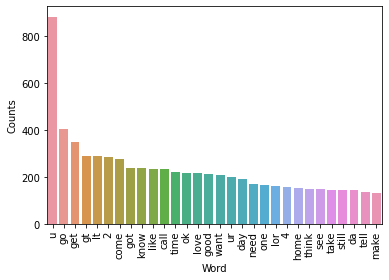

In [43]:
sns.barplot(x='Word', y='Counts', data = df_ham_word_counter)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [45]:
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
X.shape

(5169, 3000)

In [49]:
y = df['target'].values

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
y.shape

(5169,)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [57]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [58]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [59]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [60]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"